In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')

# Select features and target variable
X = df[['Age','Purchased']]
y = df[['EstimatedSalary']]
y_train = np.squeeze(y_train.to_numpy())
# Split the dataset into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def logistic_regression_from_scratch(X_train, y_train, X_test, learning_rate=0.01, epochs=1000):
    # Add a column of ones for the bias term
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

    # Initialize weights
    weights = np.zeros(X_train.shape[1])

    # Sigmoid function
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    # Gradient descent
    for epoch in range(epochs):
        z = np.dot(X_train, weights)
        predictions = sigmoid(z)
        gradient = np.dot(X_train.T, (predictions - y_train)) / y_train.size
        weights -= learning_rate * gradient

    # Predictions on the test set
    test_predictions = sigmoid(np.dot(X_test, weights))

    # Ensure the predictions are reshaped to a 1D array
    return test_predictions.flatten()


# Logistic Regression from Scratch on raw data
predictions_scratch_raw = logistic_regression_from_scratch(X_train, y_train, X_test)
predictions_scratch_raw = np.round(predictions_scratch_raw)

# Logistic Regression using scikit-learn on raw data
model_sklearn_raw = LogisticRegression()
model_sklearn_raw.fit(X_train, y_train)
predictions_sklearn_raw = model_sklearn_raw.predict(X_test)

# Normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Logistic Regression from Scratch on normalized data
predictions_scratch_normalized = logistic_regression_from_scratch(X_train_normalized, y_train, X_test_normalized)

# Logistic Regression using scikit-learn on normalized data
model_sklearn_normalized = LogisticRegression()
model_sklearn_normalized.fit(X_train_normalized, y_train)
predictions_sklearn_normalized = model_sklearn_normalized.predict(X_test_normalized)

# Standardization
scaler_standardized = StandardScaler()
X_train_standardized = scaler_standardized.fit_transform(X_train)
X_test_standardized = scaler_standardized.transform(X_test)

# Logistic Regression from Scratch on standardized data
predictions_scratch_standardized = logistic_regression_from_scratch(X_train_standardized, y_train, X_test_standardized)

# Logistic Regression using scikit-learn on standardized data
model_sklearn_standardized = LogisticRegression()
model_sklearn_standardized.fit(X_train_standardized, y_train)
predictions_sklearn_standardized = model_sklearn_standardized.predict(X_test_standardized)

# Evaluate the models
accuracy_scratch_raw = accuracy_score(y_test, predictions_scratch_raw)
accuracy_sklearn_raw = accuracy_score(y_test, predictions_sklearn_raw)

accuracy_scratch_normalized = accuracy_score(y_test, np.round(predictions_scratch_normalized))
accuracy_sklearn_normalized = accuracy_score(y_test, predictions_sklearn_normalized)

accuracy_scratch_standardized = accuracy_score(y_test, np.round(predictions_scratch_standardized))
accuracy_sklearn_standardized = accuracy_score(y_test, predictions_sklearn_standardized)

# Print results
print("Accuracy (from scratch) on raw data:", accuracy_scratch_raw)
print("Accuracy (scikit-learn) on raw data:", accuracy_sklearn_raw)

print("\nAccuracy (from scratch) on normalized data:", accuracy_scratch_normalized)
print("Accuracy (scikit-learn) on normalized data:", accuracy_sklearn_normalized)

print("\nAccuracy (from scratch) on standardized data:", accuracy_scratch_standardized)
print("Accuracy (scikit-learn) on standardized data:", accuracy_sklearn_standardized)



AttributeError: 'DataFrame' object has no attribute 'reshape'

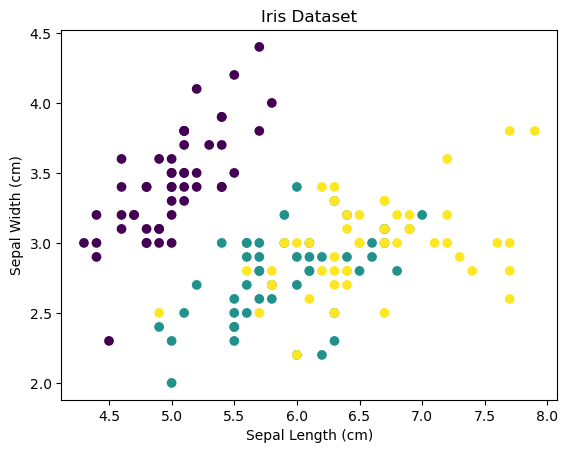

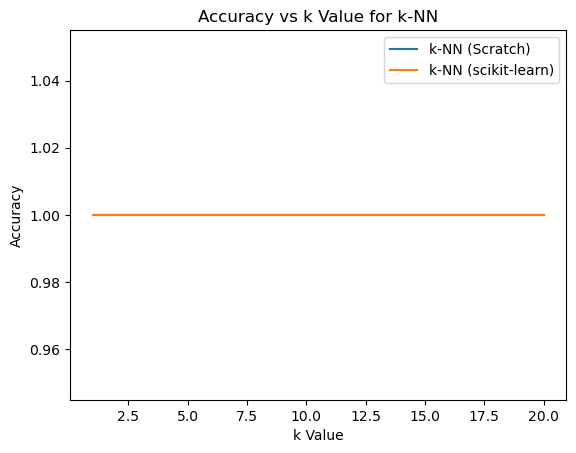

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset')
plt.show()

# k-NN from scratch
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def k_nearest_neighbors(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_neighbors_indices = np.argsort(distances)[:k]
    k_neighbor_labels = [y_train[i] for i in k_neighbors_indices]
    most_common = np.bincount(k_neighbor_labels).argmax()
    return most_common

def predict_knn(X_train, y_train, X_test, k):
    predictions = [k_nearest_neighbors(X_train, y_train, x_test, k) for x_test in X_test]
    return predictions

# k-NN from scratch predictions
k_values = range(1, 21)
accuracy_scratch = []

for k in k_values:
    y_pred_scratch = predict_knn(X_train, y_train, X_test, k)
    accuracy_scratch.append(accuracy_score(y_test, y_pred_scratch))

# k-NN with scikit-learn
accuracy_sklearn = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_sklearn = model.predict(X_test)
    accuracy_sklearn.append(accuracy_score(y_test, y_pred_sklearn))

# Plot accuracy vs k value graph
plt.plot(k_values, accuracy_scratch, label='k-NN (Scratch)')
plt.plot(k_values, accuracy_sklearn, label='k-NN (scikit-learn)')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k Value for k-NN')
plt.legend()
plt.show()
